In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /home/hchang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [2]:
data = pd.read_csv("../../data/news/allnews.csv")
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 38053


In [3]:
data.head()

,신문사,분류,제목,본문,날짜 및 시간
0,프레시안,경제,뉴라운드 협상 이제부터다 - WTO 국민연대 장원석 집행위원장의 협상 참관기,지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구(WTO) 각료...,['2001-11-21 09:53:00']
1,프레시안,세계,"미, 이슬람권 대상 방송국 설립 추진 - 본격 선전전 나서",미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 ...,['2001-11-21 09:53:00']
2,프레시안,정치,개혁신당 운동 젊은 의원들이 밀어붙여라 - 이부영 한나라당 부총재 인터뷰,한나라당 이부영 부총재는 19일 프레시안과 인터뷰를 갖고 개혁신당 운동에 대해 ...,['2001-11-21 09:53:00']
3,프레시안,세계,잊혀진 나라 '아프간' <6ㆍ끝> - 누가 이 전쟁을 멈출 것인가,아프간의 기아 참상을 영화로 찍기 위해 방글라데시 유엔 대표인 카말 후세인 박사...,['2001-11-20 10:01:00']
4,프레시안,세계,"미국, 고문 합법화. 비밀재판 추진 - ""미국이외는 야만이라는 미국의 야만적 사고""",“테러범들에 대한 고문을 합법화해야 한다.”\n “테러범들은 비밀리에 항공모함...,['2001-11-20 10:01:00']


In [4]:
data = data[['본문','제목']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,본문,제목
37276,내년부터 ‘부실 우려가 있는’ 금융기관에 대해 예금보험공사가 직접 조사를 벌인다.\...,"預保, 부실 금융기관 직접 조사"
2711,미국 뉴스사이트에 ‘게임형 기사’(사진)가 등장해 화제다. 바로 온라인뉴스 사이트인...,“게임으로 뉴스를 읽는다”-미 온라인신문 ‘엔론 비난 게임’ 화제
1525,"【대전=뉴시스】\n\n환경단체의 반발에도 불구, 대전도시개발공사가 추진키로 한 보문...",(대전)대전 보문산 관음지구 시민골프장 추진
35439,‘간판급 아티스트’ 앨범 부재와 전반적인 음반시장 침체라는 이중고 속에서 매출이 부...,음반직배사 공격 마케팅 시동
33024,지방 기업의 생산과 소비가 크게 늘어나는 등 지역경제가 회복세를 보이고 있다. 최근...,[이코노트렌드] 지역경제 생산·소비 등 기지개
29791,[edaily 강종구기자] 이란은 미국이 이라크를 공격할 경우 이라크 난민수용자수를...,"이란, ""이라크전 난민 20만명으로 제한"""
15432,(가자시티=연합뉴스) 팔레스타인해방기구(PLO)는 오는 9월13일 팔레스타인 독립을...,"PLO, 9월13일 독립 선포(2보)"
19968,(서울=연합뉴스) 고형규기자= 제3대 민선 서울시교육감에 유인종(劉仁鍾.68) 현교...,유인종 서울시교육감 재선-결선투표서 59.2% 얻어
37785,”문재인 대통령민정수석비서관이 국가정보원측에 상당히 화를 내 국정원이 이를 수습하느...,"준비된 실세인가, 벼락스타인가"
35591,SK텔레콤에 영업정지 내려질까.\nSK텔레콤과 SK신세기통신의 법인합병인가조건 이행...,"""SKT에 영업정지 내려달라"""


In [5]:
print('본문 열에서 중복을 배제한 유일한 샘플의 수 :', data['본문'].nunique())
print('제목 열에서 중복을 배제한 유일한 샘플의 수 :', data['제목'].nunique())

본문 열에서 중복을 배제한 유일한 샘플의 수 : 35940
제목 열에서 중복을 배제한 유일한 샘플의 수 : 36039


In [6]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['본문'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35941


In [7]:
print(data.isnull().sum())

본문    1
제목    1
dtype: int64


In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
import os
os.listdir('/home/hchang/nltk_data/corpora/stopwords')

['slovene',
 'italian',
 'romanian',
 'english',
 'portuguese',
 'azerbaijani',
 'german',
 'hungarian',
 'swedish',
 'russian',
 'finnish',
 'indonesian',
 'danish',
 'README',
 'dutch',
 'tajik',
 'french',
 'norwegian',
 'nepali',
 'bengali',
 'spanish',
 'greek',
 'arabic',
 'kazakh',
 'turkish']

In [11]:
# print('불용어 개수 :', len(stopwords.words('ko') ))
# print(stopwords.words('english'))

In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    # sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    # sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    # sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    # sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z가-힣ㄱ-ㅎ0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    # sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    sentence = re.sub("\s+", ' ', sentence)
    # 불용어 제거 (Text)
    # if remove_stopwords:
    #     tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    # else:
    #     tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return sentence
print('=3')

=3


In [13]:
temp_text = '오늘도 끝내주게 바쁜 하루였다. ... [중략] 어디서부터 고쳐볼까?'
temp_summary = '오늘도 바빴다.'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  오늘도 끝내주게 바쁜 하루였다 중략 어디서부터 고쳐볼까 
summary: 오늘도 바빴다 


In [14]:
from tqdm import tqdm

In [15]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in tqdm(data['본문']):
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

100%|██████████| 35939/35939 [00:11<00:00, 3211.34it/s]

Text 전처리 후 결과:  [' 지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구 wto 각료회의에서 우리의 관심 사항은 시장접근 국내보조 비교역적 관심사항 ntc 등이었다 특히 농업 부문 협상의 성패는 그야말로 농업이 사느냐 죽느냐의 관건이라 해도 과언이 아니었다 일례를 들어 현재 농축산물의 평균관세는 60 수준인데 수출강대국의 요구대로 철폐 내지 대폭 감축한다면 우리의 가격경쟁력은 50 60 떨어지게 되기 때문이다 이를 극복하기 위해서는 기술 경영 유통 등의 구조혁신에 의하여 생산비를 50 60 이상 줄여야 하는데 이에는 20년 내지 30년 이상 소요된다 이처럼 순간의 협상이 엄청난 결과를 가져오는 것이다 그런데도 냉혹한 국제환경 속에서 우리의 대응책은 골리앗에 대항하여 싸우는 다윗처럼 비쳐졌다 그러므로 정부 혼자만의 힘으로는 안 되고 국민적 힘과 지혜를 모아 함께 대응해야 하는 사안이었다 이러한 처지는 강대국도 마찬가지이기는 하다 유럽연합 eu 은 농민단체의 요구와 시위를 교묘하게 이용했다 일본도 의원들과 전국농협중앙회 등 ngo의 지원을 받아가며 세계무역기구 사무국 실력자들을 만나 국내여론을 전하고 입장을 표명하는 등 동분서주하였다 제3세계에서는 정부의 협상력을 보완하기 위해 민간전문가들을 정부대표로 위장시켜 내세우기도 했다 미국마저 협상대표들은 국내 압력단체들을 설득할 수 있는 용어의 선택에 신경 쓰면서 우리나라 등 ntc 농업의 비교역적 관심사항 그룹 대표들에게 양해를 구하는 등 온갖 수단과 방법을 동원하는 것을 전해 들으면서 초강대국 미국 역시 다자간 협상장인 wto 협상에서는 한계가 있다는 것을 느꼈다 여하튼 wto 협상은 정부 의회 ngo들이 때로는 비판하고 때로는 공동대응하면서 국가와 국민 계층의 이익을 관철시키기 위해 추호의 허술함도 보여서는 안 되는 전쟁과도 같은 것이었다 wto 협상 농업부문의 3대 목표 당초에 농업과 관련해서 우리 ngo와 정부가 관철시키려 한 것은 다음의 세 가지였다 첫째 wto가 마련한 초안에 의하

In [16]:
clean_summary = []
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in tqdm(data['제목']):
    clean_summary.append(preprocess_sentence(s, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

100%|██████████| 35939/35939 [00:00<00:00, 65139.74it/s]

Summary 전처리 후 결과:  ['뉴라운드 협상 이제부터다 wto 국민연대 장원석 집행위원장의 협상 참관기', '미 이슬람권 대상 방송국 설립 추진 본격 선전전 나서', '개혁신당 운동 젊은 의원들이 밀어붙여라 이부영 한나라당 부총재 인터뷰', '잊혀진 나라 아프간 6 끝 누가 이 전쟁을 멈출 것인가', '미국 고문 합법화 비밀재판 추진 미국이외는 야만이라는 미국의 야만적 사고']


In [17]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [18]:
data.isnull().sum()

본문         0
제목         0
Text       0
Summary    0
dtype: int64

In [19]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 5332
텍스트의 평균 길이 : 211.21063468655223
요약의 최소 길이 : 0
요약의 최대 길이 : 18
요약의 평균 길이 : 5.328974094994296


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


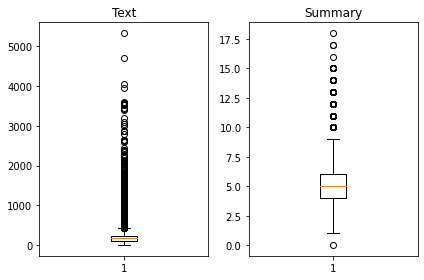

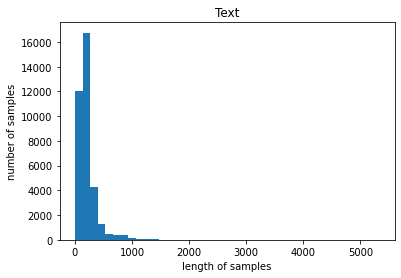

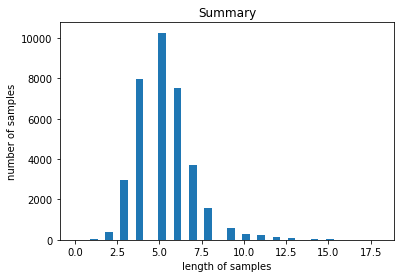

In [20]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
text_max_len = 600
summary_max_len = 15
print('=3')

=3


In [22]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [23]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 600 이하인 샘플의 비율: 0.964717994379365
전체 샘플 중 길이가 15 이하인 샘플의 비율: 0.9998887002977267


In [24]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 34671


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 600
텍스트의 평균 길이 : 184.55268091488563
요약의 최소 길이 : 1
요약의 최대 길이 : 15
요약의 평균 길이 : 5.227567707882669


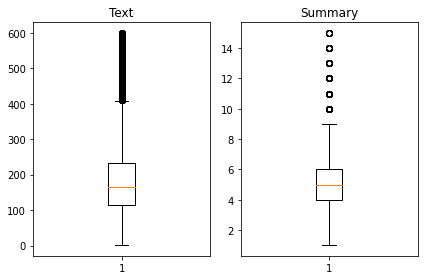

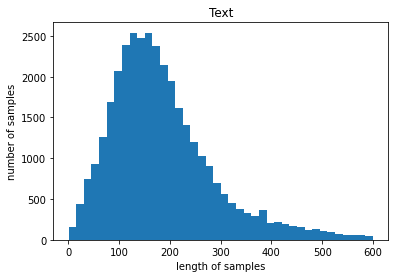

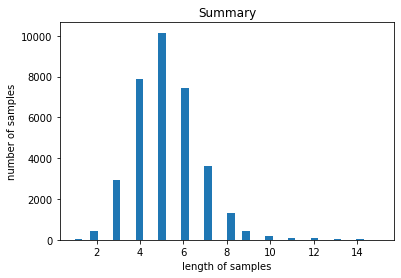

In [25]:
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
data[data['Text'].apply(lambda x: len(x.split()) == 15)]

,본문,제목,Text,Summary
2192,"13일 열린 정기총회에서 임기 2년의 회장으로 재선출됐다.또 명예회장에 김성환씨,부...",[동정] 이홍우 한국시사만화가회회장,13일 열린 정기총회에서 임기 2년의 회장으로 재선출됐다 또 명예회장에 김성환씨 부...,동정 이홍우 한국시사만화가회회장
25165,거래소 투자자별 순매수 규모\n\n외국인 -3억원\n\n기관 -526억원\n\n개인...,[외국인/기관/개인동향] 거래소 외인 3억 순매도-30일 10:00,거래소 투자자별 순매수 규모 외국인 3억원 기관 526억원 개인 333억원 프로그램...,외국인 기관 개인동향 거래소 외인 3억 순매도 30일 10 00
25191,거래소 투자자별 순매수 규모\n\n외국인 118억원\n\n기관 -791억원\n\n개...,[외국인/기관/개인동향] 거래소 외국인 118억원 순매수-30일 오전 11:05,거래소 투자자별 순매수 규모 외국인 118억원 기관 791억원 개인 463억원 프로...,외국인 기관 개인동향 거래소 외국인 118억원 순매수 30일 오전 11 05
25435,김재수 현대그룹 구조조정위원장은 31일 오후 2시 계동사옥 15층 대회의실에서 유동...,"[일반] 현대, 오후 2시 최종 자구책 발표(속보1)",김재수 현대그룹 구조조정위원장은 31일 오후 2시 계동사옥 15층 대회의실에서 유동...,일반 현대 오후 2시 최종 자구책 발표 속보1
25452,김재수 현대그룹 구조조정위원장은 31일 오후 2시 계동사옥 15층 대회의실에서 유동...,"[일반] 현대, 오후 2시 최종 자구책 발표(1보)",김재수 현대그룹 구조조정위원장은 31일 오후 2시 계동사옥 15층 대회의실에서 유동...,일반 현대 오후 2시 최종 자구책 발표 1보
25562,거래소 투자자별 순매수 규모\n\n외국인 171억원\n\n기관 402억원\n\n개인...,[외국인/기관/개인동향] 거래소 기관 402억원 순매수-1일 10:18,거래소 투자자별 순매수 규모 외국인 171억원 기관 402억원 개인 733억원 프로...,외국인 기관 개인동향 거래소 기관 402억원 순매수 1일 10 18
26007,코스닥 투자주체별 매매동향\n\n외국인 +53억원\n\n기관 -98억원\n\n투신 ...,[외국인/기관/개인동향] 코스닥 외인 53억 순매수-5일 10:33,코스닥 투자주체별 매매동향 외국인 53억원 기관 98억원 투신 74억원 개인 5억원...,외국인 기관 개인동향 코스닥 외인 53억 순매수 5일 10 33
26027,코스닥 투자주체별 매매동향\n\n외국인 +70억원\n\n기관 -124억원\n\n투신...,[외국인/기관/개인동향] 코스닥 기관 124억 순매도-5일 11:38,코스닥 투자주체별 매매동향 외국인 70억원 기관 124억원 투신 113억원 개인 3...,외국인 기관 개인동향 코스닥 기관 124억 순매도 5일 11 38
26056,"13일 전북 전주시 완산구 태평1동 12-22 자택, 발인 15일 오전 9시40분....",[부음] 眞成정사씨(진각종 향수심인당 주교) 모친상,13일 전북 전주시 완산구 태평1동 12 22 자택 발인 15일 오전 9시40분 0...,부음 정사씨 진각종 향수심인당 주교 모친상
26076,"@신진피혁공업·두산포장＝각각 유니켐, 두산테크팩으로 변경상장.\n\n@송원칼라·현대...",[공시] 신진피혁공업/두산포장/송원칼라/현대건설,신진피혁공업 두산포장 각각 유니켐 두산테크팩으로 변경상장 송원칼라 현대건설 대표이...,공시 신진피혁공업 두산포장 송원칼라 현대건설


In [27]:
data = data[data['Text'].apply(lambda x: len(x.split()) >= 11)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 34615


In [28]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,본문,제목,Text,Summary,decoder_input,decoder_target
1,미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 ...,"미, 이슬람권 대상 방송국 설립 추진 - 본격 선전전 나서",미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 것...,미 이슬람권 대상 방송국 설립 추진 본격 선전전 나서,sostoken 미 이슬람권 대상 방송국 설립 추진 본격 선전전 나서,미 이슬람권 대상 방송국 설립 추진 본격 선전전 나서 eostoken
6,영국의 경제전문지 파이낸셜타임스가 18일(현지시간) 우리나라의 차세대전투기(FX...,"한국 국방부, 미 보잉사 위해 로비? - 파이낸셜타임스 보도",영국의 경제전문지 파이낸셜타임스가 18일 현지시간 우리나라의 차세대전투기 fx 선...,한국 국방부 미 보잉사 위해 로비 파이낸셜타임스 보도,sostoken 한국 국방부 미 보잉사 위해 로비 파이낸셜타임스 보도,한국 국방부 미 보잉사 위해 로비 파이낸셜타임스 보도 eostoken
10,미국 금융기관들이 연말을 맞아 마치 경쟁이라도 벌이듯 직원들을 무더기 감원하고 ...,"美 금융계, 무더기 감원 - 시티그룹 선두로 JP모건, 아멕스, 메릴린치",미국 금융기관들이 연말을 맞아 마치 경쟁이라도 벌이듯 직원들을 무더기 감원하고 있...,금융계 무더기 감원 시티그룹 선두로 jp모건 아멕스 메릴린치,sostoken 금융계 무더기 감원 시티그룹 선두로 jp모건 아멕스 메릴린치,금융계 무더기 감원 시티그룹 선두로 jp모건 아멕스 메릴린치 eostoken
17,미국이 하이닉스 반도체와 관련한 압력을 철회했다는 일부 국내언론 보도와는 정반대...,"'하이닉스 지원' 싸고 한미 갈등 - 미, 한국에 2차례 질의서 보내 해명 요구",미국이 하이닉스 반도체와 관련한 압력을 철회했다는 일부 국내언론 보도와는 정반대로...,하이닉스 지원 싸고 한미 갈등 미 한국에 2차례 질의서 보내 해명 요구,sostoken 하이닉스 지원 싸고 한미 갈등 미 한국에 2차례 질의서 보내 해명 요구,하이닉스 지원 싸고 한미 갈등 미 한국에 2차례 질의서 보내 해명 요구 eostoken
21,37조원의 국민주택기금 운용권을 둘러싸고 국민은행과 우리금융지주회사 사이에 한판...,"국민ㆍ한빛, 주택기금운용 갈등 - 한빛, 운용권 이양 요구",37조원의 국민주택기금 운용권을 둘러싸고 국민은행과 우리금융지주회사 사이에 한판 ...,국민 한빛 주택기금운용 갈등 한빛 운용권 이양 요구,sostoken 국민 한빛 주택기금운용 갈등 한빛 운용권 이양 요구,국민 한빛 주택기금운용 갈등 한빛 운용권 이양 요구 eostoken


In [29]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [30]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[22973  1153 13519 ...  3203  8368 29185]


In [31]:
what = np.arange(50)
what

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [32]:
encoder_input[[3,2,1,3]]

array([' 미국이 하이닉스 반도체와 관련한 압력을 철회했다는 일부 국내언론 보도와는 정반대로 하이닉스 처리를 둘러싼 우리나라 정부와 미국 정부간 갈등과 긴장이 심해지고 있다고 영국의 파이낸셜 타임스 ft 지가 20일 현지시간 보도했다 미국무역대표부가 지난 8월 우리나라 정부에 하이닉스 처리와 관련한 2차 질의서한을 보냈으나 정부가 아직까지 이에 대한 회신을 하지 않고 공적자금 투입은행들을 통한 하이닉스 지원을 강행해 양국 정부간 갈등이 심화되고 있다는 것이다 ft의 한 미 정부간 갈등 심화 보도 ft는 20일 현지시간 하이닉스 지원이 워싱턴과의 긴장을 고조시키고 있다 는 제하의 기사에서 그동안 알려지지 않았던 한 미 양국간의 팽팽한 신경전을 전했다 보도에 따르면 미국 무역담당 관리들은 최근 몇 달 사이에 한국의 재정경제부장관에게 하이닉스를 파산으로부터 구제하기 위한 지원에서 한국정부의 역할을 묻는 편지들을 보냈다 그러나 두 번째 편지에 대해선 아직 답변이 없었다 그 여파인지 이달초 워싱턴은 한국을 미국내 철강시장에서 덤핑을 하고 있는 국가들 가운데 하나로 지정했다 재정경제부의 변양호 금융정책국장은 ft와의 인터뷰에서 지난 3월 하이닉스에 관련된 1백여 질문을 담은 편지를 받아 답변을 해줬으나 8월에 받은 두 번째 편지에 대해선 아직 답변을 하지 않았다 고 밝혔다 변국장은 이어 하이닉스에 대한 지원결정은 완전히 채권단에 의해 이뤄지고 있으며 정부는 이를 지지할 뿐 이라고 덧붙였다 ft는 그러나 하이닉스 지원은행들의 최대주주가 한국정부라는 점을 들어 지원결정에 정치적 의도가 포함돼 있는 게 아니냐는 의구심을 제기하고 있다 실제로 미국의 마이크론과 독일의 인피네온은 지난달 이뤄진 70억달러 규모의 상환연장 및 신규대출을 자유시장원리와 배치되는 것 이라고 주장하고 있다고 ft는 전했다 상반되는 국내언론의 낙관론적 보도 이같은 ft 보도는 같은 시간대인 21일 오전 매일경제신문의 하이닉스 압력 철회 라는 보도와 상반되고 있다 이 신문은 하이닉스 구조조정 과정에서 

In [33]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [34]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 6923


In [35]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 27692
훈련 레이블의 개수 : 27692
테스트 데이터의 개수 : 6923
테스트 레이블의 개수 : 6923


In [36]:
tokenizer = Tokenizer() # 토크나이저 정의
tokenizer.fit_on_texts(hi := encoder_input_train+decoder_input_train +['eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken eostoken']) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [37]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 751854
등장 빈도가 2번 이하인 희귀 단어의 수: 585888
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 165966
단어 집합에서 희귀 단어의 비율: 77.92576750273325
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.38613807505888


In [38]:
src_vocab = 180000
tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 180,000으로 제한
tokenizer.fit_on_texts(hi) # 단어 집합 재생성
print('=3')

=3


In [39]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train_tenser = tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test_tenser = tokenizer.texts_to_sequences(encoder_input_test)
decoder_input_train_tenser = tokenizer.texts_to_sequences(decoder_input_train)
decoder_input_test_tenser = tokenizer.texts_to_sequences(decoder_input_test)


# 잘 진행되었는지 샘플 출력
print(encoder_input_train_tenser[:3])

[[165967, 7626, 8, 206, 887, 33455, 40576, 37881, 855, 1995, 8, 206, 98, 1030, 22153, 98, 165968, 168, 165969, 174, 76, 322, 5706, 40577, 135, 71729, 1014, 105, 71730, 198, 900, 8270, 98, 64, 86, 98855, 407, 67, 321, 44, 6339, 744, 315, 4057, 135, 855, 6340, 9, 8, 8949, 266, 123197, 185, 5538, 4622, 11053, 8800, 165970, 7422, 165971, 98856, 14308, 35543, 855, 1995, 165972, 185, 5538, 878, 11053, 8800, 165973, 7422, 165971, 98856, 14308, 67, 23850, 165974, 855, 1995, 25953, 8, 206, 47273, 3025, 165975, 228, 123198, 123199, 8157, 108, 205, 67, 165975, 76, 773, 33456, 1995, 8, 37882, 172, 30, 632, 117, 63, 165976, 64, 140, 22973, 135, 700, 8, 206, 6112, 82921, 98, 35544, 1040, 44, 14309, 2722, 1643, 78, 47274, 895, 78, 12799, 415, 63, 9898, 51674, 35545, 35544, 67, 67, 321, 8, 206, 2199, 626, 108, 9253, 108, 1103, 44, 76, 8950, 855, 719, 7, 9, 3596, 98857, 129, 909, 67, 59, 8950, 98, 3152, 8662, 9, 8, 206, 3845, 238, 246, 8157, 108, 63441, 4545, 362, 4622, 108, 777, 44, 878, 108, 234, 117

In [40]:
decoder_target_train_tenser = tokenizer.texts_to_sequences(decoder_target_train)
decoder_target_test_tenser = tokenizer.texts_to_sequences(decoder_target_test)


In [41]:
# tar_tokenizer = Tokenizer()
# tar_tokenizer.fit_on_texts(decoder_input_train)
# print('=3')

In [42]:
# threshold = 3
# total_cnt = len(tar_tokenizer.word_index) # 단어의 수
# rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
# total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
# rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# for key, value in tar_tokenizer.word_counts.items():
#     total_freq = total_freq + value

#     # 단어의 등장 빈도수가 threshold보다 작으면
#     if(value < threshold):
#         rare_cnt = rare_cnt + 1
#         rare_freq = rare_freq + value

# print('단어 집합(vocabulary)의 크기 :', total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [43]:
# set(tar_tokenizer.index_word.values()) - set(src_tokenizer.index_word.values())

In [44]:
# tar_vocab = 10000
# tar_tokenizer = Tokenizer(num_words=tar_vocab) 
# tar_tokenizer.fit_on_texts(decoder_input_train)
# tar_tokenizer.fit_on_texts(decoder_target_train)

# # 텍스트 시퀀스를 정수 시퀀스로 변환
# decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
# decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
# decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
# decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# # 잘 변환되었는지 확인
# print('input')
# print('input ',decoder_input_train[:5])
# print('target')
# print('decoder ',decoder_target_train[:5])

In [45]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 27692
훈련 레이블의 개수 : 27692
테스트 데이터의 개수 : 6923
테스트 레이블의 개수 : 6923


In [46]:
encoder_input_train = pad_sequences(encoder_input_train_tenser, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test_tenser, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train_tenser, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train_tenser, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test_tenser, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test_tenser, maxlen=summary_max_len, padding='post')
print('=3')

=3


In [47]:
import tensorflow as tf
# tf.debugging.set_log_device_placement(False)

In [48]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

2022-05-24 16:21:35.451296: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-24 16:21:36.500248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6666 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


In [49]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(src_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [50]:
# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 128)     23040000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 600, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [51]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 600, 128)     23040000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 600, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [52]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=16, callbacks=[es], epochs=50)

Epoch 1/50


2022-05-24 16:21:47.646935: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 2070" frequency: 1455 num_cores: 36 environment { key: "architecture" value: "7.5" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 6989807616 bandwidth: 352064000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2022-05-24 16:21:50.073514: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f9c52fd3280>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 545, in __del__
    gen_dataset_ops.delete_iterator(
  File "/opt/conda/lib/python3.9/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1263, in delete_iterator
    _result = pywrap_tfe.TFE_Py_FastPathExecute(
KeyboardInterrupt: 


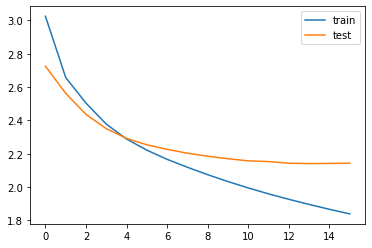

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('=3')

=3


In [ ]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : bought iams kitten formula cheapest pet store kitten likes give diarrhea anything smell room much qualifies good kitten food book 
실제 요약 : kitten likes it 
예측 요약 :  not for my dog


원문 : got paid complaints buying food storage light easily stored perfect 
실제 요약 : as good as advertised 
예측 요약 :  great product


원문 : like using various types sauce foods tacos taco salads hamburgers etc first time used chipotle sauce loved smoking flavor perfect tacos fixed daughter tried liked well thick enough thick something ate hands flavor good sauce hot like taste basically good middle road sauce far heat factor providing great taste anyone wants something little different 
실제 요약 : my new favorite sauce 
예측 요약 :  great flavor


원문 : recently received one bars voxbox review purposes really quite enjoyed banana person like almonds figured would test glad would picked box grocery store since tried one purchased three boxes prefer microwave seconds since bar tastes better heated also bit crunchy ov

In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [ ]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
from importlib.metadata import version
import nltk
import tensorflow
import summa

print(nltk.__version__)
print(tensorflow.__version__)
print(version('summa'))

3.6.5
2.6.0
1.2.0


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
data.sample(10)

,headlines,text
26407,Pumps in Thai cave failed just after last boy ...,The water pumps draining the flooded cave in T...
47358,Shoaib Akhtar named brand ambassador of Pak Cr...,Former Pakistani fast bowler Shoaib Akhtar has...
35085,2 wickets in 2 balls happen twice in the same ...,"During the MI-RCB IPL match on Tuesday, two wi..."
14139,WhatsApp sets up system to store payments data...,Facebook-owned messaging service WhatsApp has ...
22052,Bajaj Electricals MD Anant Bajaj passes away a...,The Managing Director (MD) of Bajaj Electrical...
42296,Russia supplying arms to the Taliban: US,"The Commander of US forces in Afghanistan, Gen..."
62012,Bitcoin not to be used for payments for now: R...,Executive Director of Reserve Bank of India S ...
27758,Instagram may let users ask questions in Stories,Facebook-owned photo-sharing app Instagram is ...
45404,Who are the nominees for Best Actor at Oscars ...,Denzel Washington is among the nominees for th...
18323,BJP govt is India's most non-performing asset:...,"Ahead of the release of his new book, senior C..."
